<a href="https://colab.research.google.com/github/shreya139/NLP/blob/main/LA0_spaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IT412: Natural Language Processing
# Assignment0: Introduction to spaCy
---
**Name: SHREYA ARORA** <br>
**Student ID: 202218032**

---

In [ ]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textacy
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud
from collections import Counter

In [ ]:
data= pd.read_csv("https://raw.githubusercontent.com/shreya139/NLP/main/fake_papers_train_part_public.csv")

In [ ]:
data.shape

(5350, 3)

In [ ]:
data.head()

,id,text,fake
0,1,Modern two-dimensional imaging is of such qual...,0
1,2,Background: The optimal sequence of systemic p...,1
2,5,This chapter opens with a discussion of the ef...,1
3,10,The time scale of the ultra-short-term can str...,1
4,23,Electronic nose or machine olfaction are syste...,1


In [ ]:
human_gen_text = list(data[data['fake']==0]['text'])
fake_text      = list(data[data['fake']==1]['text'])

In [ ]:
len(human_gen_text)

1686

In [ ]:
nlp = spacy.load('en_core_web_sm')

---
A. For fake and human-generated articles, plot
1. the distribution of various POS tags.
2. the distribution of various punctuations
3. word clouds after stopword removal
4. the distribution of various dependency labels

In [ ]:
#creating a function that returns all the postags in the dataset and their frequency
def postag_counter(text):
  pos = []
  for t in text:
    doc = nlp(t)
    for token in doc:
      pos.append(token.pos_)
  count = Counter(pos)
  return count

In [ ]:
hg_postags = postag_counter(human_gen_text)
f_postags = postag_counter(fake_text)

In [ ]:
hg_postags_sort = dict(sorted(hg_postags.items(), key=lambda x:x[1], reverse=True))
f_postags_sort = dict(sorted(f_postags.items(), key=lambda x:x[1], reverse=True))

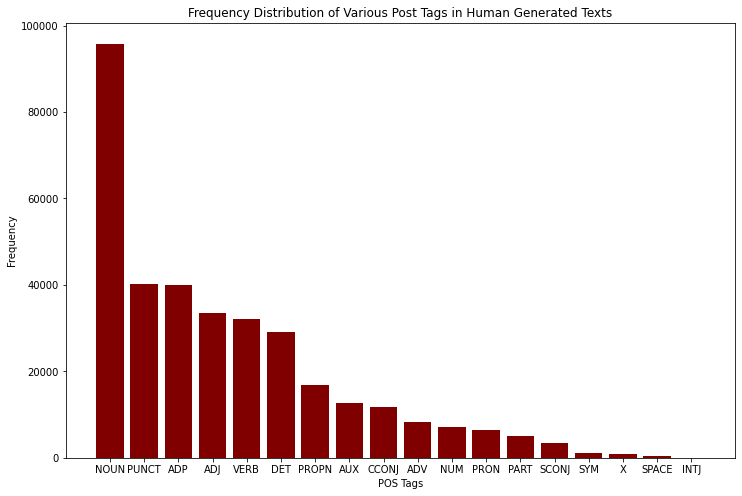

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(hg_postags_sort.keys(), hg_postags_sort.values(), color= 'maroon')
plt.title("Frequency Distribution of Various Post Tags in Human Generated Texts")
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.show()

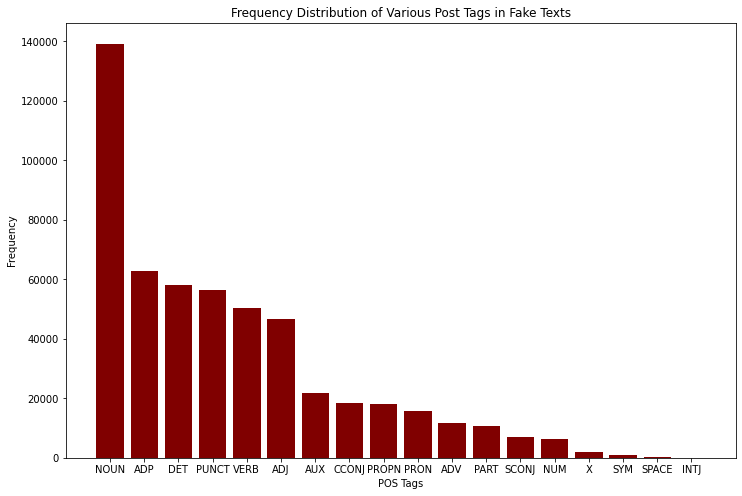

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(f_postags_sort.keys(), f_postags_sort.values(), color= 'maroon')
plt.title("Frequency Distribution of Various Post Tags in Fake Texts")
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.show()

**Interpretation:** From the above graphs, we can see that the most common POS tag in both type of texts is NOUN. However, there are higher Adpositions and Determiners in Fake texts compared to Human Generated texts. There are very less Proper Nouns in the Fake texts comapred to the Human Generated texts.

In [ ]:
#creating a function which returns the number of a certain POS tag in every entry of the dataset
def POS_dist(text, name):
  namec = []
  for t in text:
    doc = nlp(t)
    pos = []
    for token in doc:
      pos.append(token.pos_)
      count = Counter(pos)
    namec.append(count[name])
  return namec

In [ ]:
hg_noun = POS_dist(human_gen_text, 'NOUN')
f_noun = POS_dist(fake_text, 'NOUN')

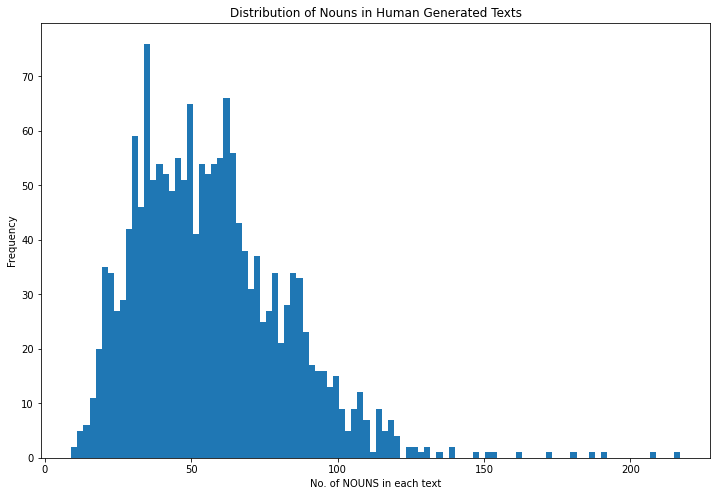

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(hg_noun, bins = 100)
plt.title("Distribution of Nouns in Human Generated Texts")
plt.xlabel("No. of NOUNS in each text")
plt.ylabel("Frequency")
plt.show()

In [ ]:
for i in f_noun:
  if i>250:
    f_noun.remove(i)

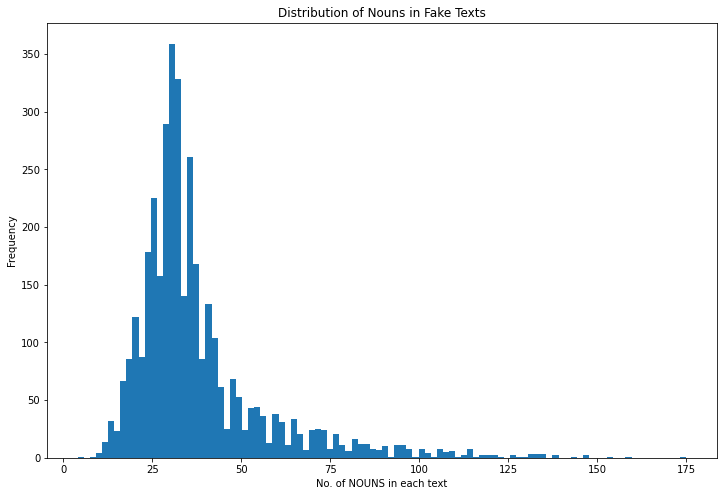

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(f_noun, bins= 100)
plt.title("Distribution of Nouns in Fake Texts")
plt.xlabel("No. of NOUNS in each text")
plt.ylabel("Frequency")
plt.show()

**Interpretation:** From the above two graphs, we can see that the number of NOUNS in Fake text lies majorly between 24 to 40, whereas in the human generated texts can go beyond 90 easily.

---
2. the distribution of various punctuations

In [ ]:
#creating a function that returns all the punctuations in the dataset and their frequency
def punct_counter(text):
  punct = []
  for t in text:
    doc = nlp(t)
    for token in doc:
      if token.pos_ == 'PUNCT':
        punct.append(token.text)
  count = Counter(punct)
  return count

In [ ]:
hg_punct = punct_counter(human_gen_text)
f_punct = punct_counter(fake_text)

In [ ]:
hg_punct_sort = dict(sorted(hg_punct.items(), key=lambda x:x[1], reverse=True))
f_punct_sort = dict(sorted(f_punct.items(), key=lambda x:x[1], reverse=True))

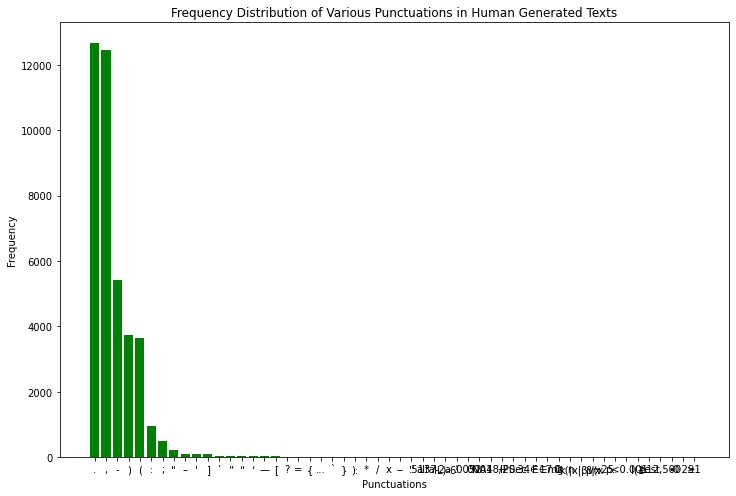

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(hg_punct_sort.keys(), hg_punct_sort.values(), color= 'green')
plt.title("Frequency Distribution of Various Punctuations in Human Generated Texts")
plt.xlabel("Punctuations")
plt.ylabel("Frequency")
plt.show()

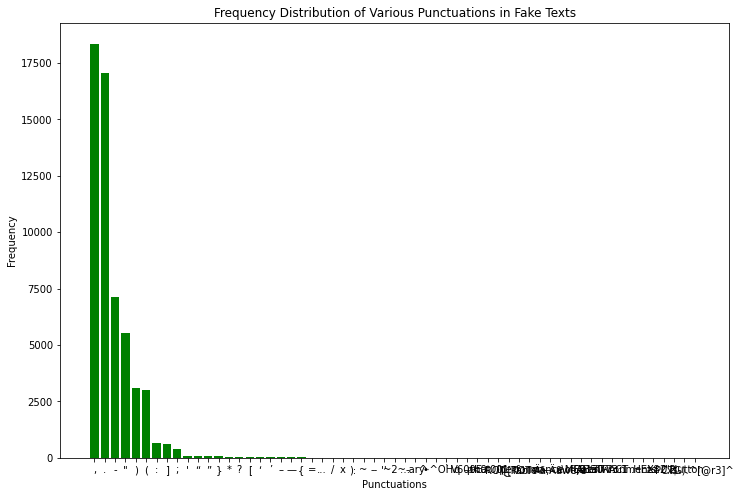

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(f_punct_sort.keys(), f_punct_sort.values(), color= 'green')
plt.title("Frequency Distribution of Various Punctuations in Fake Texts")
plt.xlabel("Punctuations")
plt.ylabel("Frequency")
plt.show()

**Interpretation:** There is very less use of Quotation Marks, Colon and Semi-colon in Fake texts as compared to human generated texts.

In [ ]:
def punct_dist(text, sym):
  sym_count = []
  for t in text:
    doc = nlp(t)
    punct = []
    for token in doc:
      if token.pos_ == 'PUNCT':
        punct.append(token.text)
    num = Counter(punct)
    sym_count.append(num[sym])
  return sym_count

In [ ]:
hg_comma = punct_dist(human_gen_text, ',')
f_comma = punct_dist(fake_text, ',')

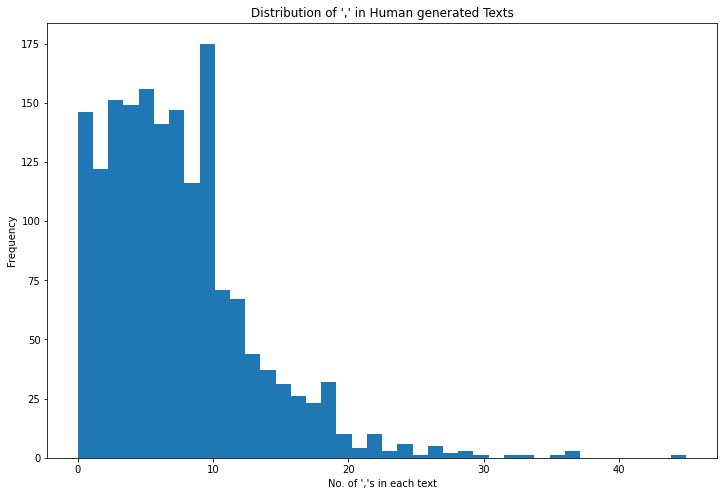

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(hg_comma, bins = 40)
plt.title("Distribution of ',' in Human generated Texts")
plt.xlabel("No. of ','s in each text")
plt.ylabel("Frequency")
plt.show()

In [ ]:
for i in f_comma:
  if i>50:
    f_comma.remove(i)

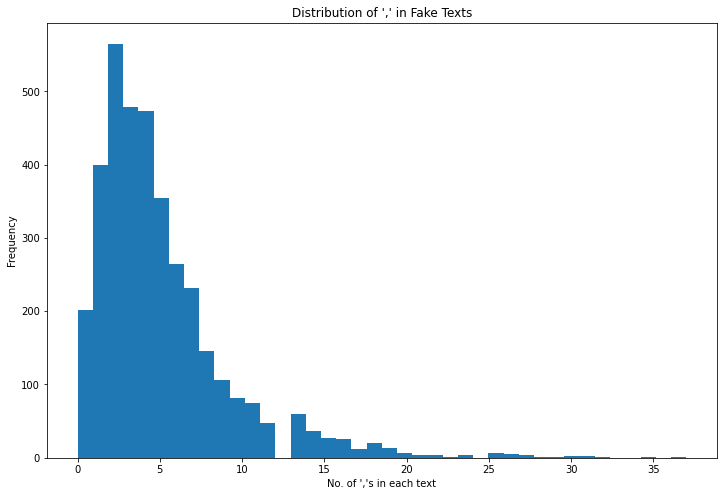

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(f_comma, bins = 40)
plt.title("Distribution of ',' in Fake Texts")
plt.xlabel("No. of ','s in each text")
plt.ylabel("Frequency")
plt.show()

**Interpretation:** Use of commas in human generated texts is comparatively more than in fake texts, as supported by the above graphs.

---
3. word clouds after stopword removal

In [ ]:
def stopword_removal(text):
  doc= nlp(text)
  tokens=[]
  newtext=""
  for tok in doc:
    tokens.append(tok.text)

  filteredwords= []
  for word in tokens:
    lex= nlp.vocab[word]
    if lex.is_stop == False:
      filteredwords.append(word)
  
  for i in range(len(filteredwords)):
        filteredwords[i] = filteredwords[i].lower()
  
  newtext += " ".join(filteredwords)+" "
  
  return newtext

In [ ]:
hg_words = stopword_removal(human_gen_text[2])
f_words = stopword_removal(fake_text[2])

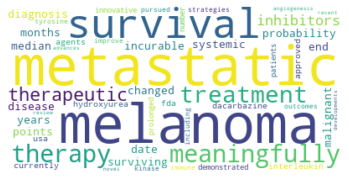

In [ ]:
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(hg_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

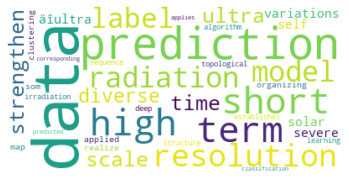

In [ ]:
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(f_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

---
4. the distribution of various dependency labels

In [ ]:
def deplab_count(text):
  dl = []
  for t in text:
    doc = nlp(t)
    for token in doc:
      dl.append(token.dep_)
  count = Counter(dl)
  return count

In [ ]:
hg_depen = deplab_count(human_gen_text)
f_depen = deplab_count(fake_text)

In [ ]:
hg_depen_sort = dict(sorted(hg_depen.items(), key=lambda x:x[1], reverse=True))
f_depen_sort = dict(sorted(f_depen.items(), key=lambda x:x[1], reverse=True))

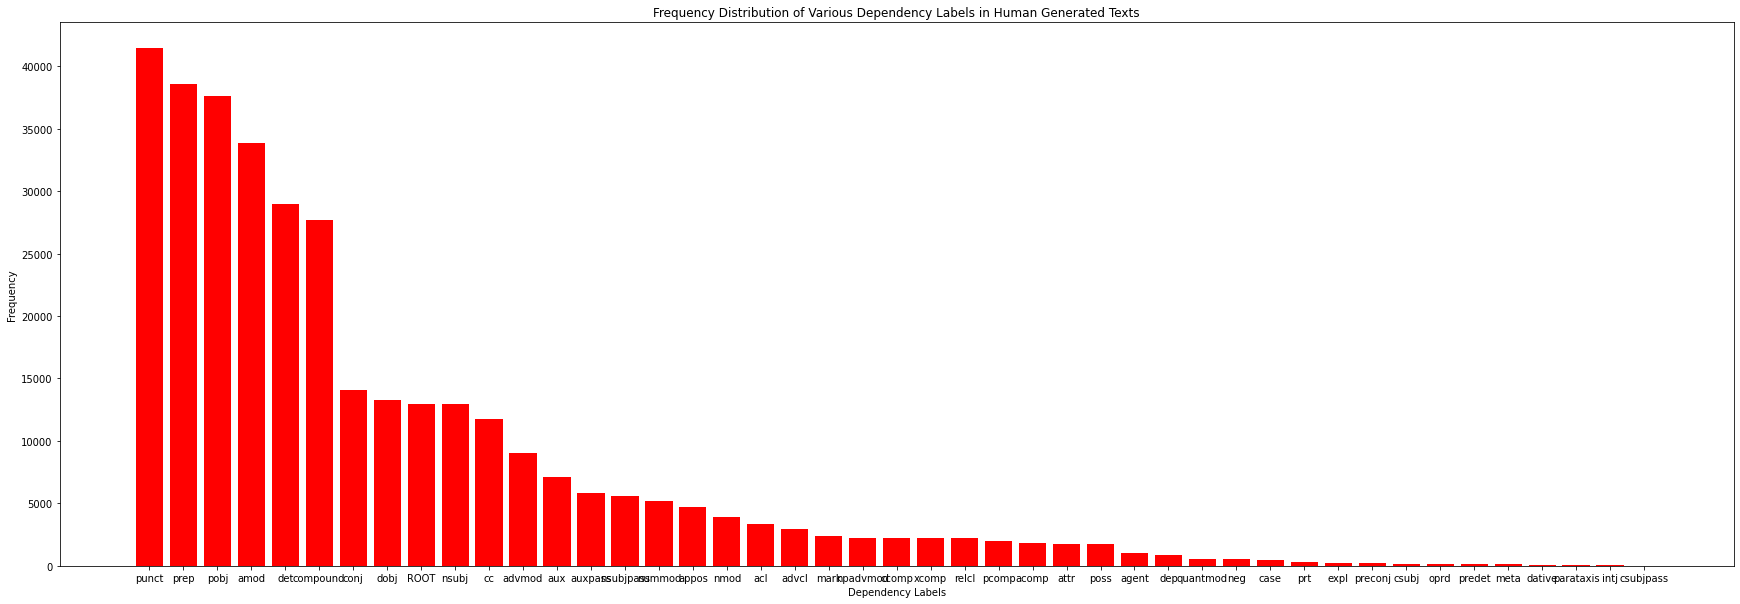

In [ ]:
plt.figure(figsize=(30,10))
plt.bar(hg_depen_sort.keys(), hg_depen_sort.values(), color= 'red')
plt.title("Frequency Distribution of Various Dependency Labels in Human Generated Texts")
plt.xlabel("Dependency Labels")
plt.ylabel("Frequency")
plt.show()

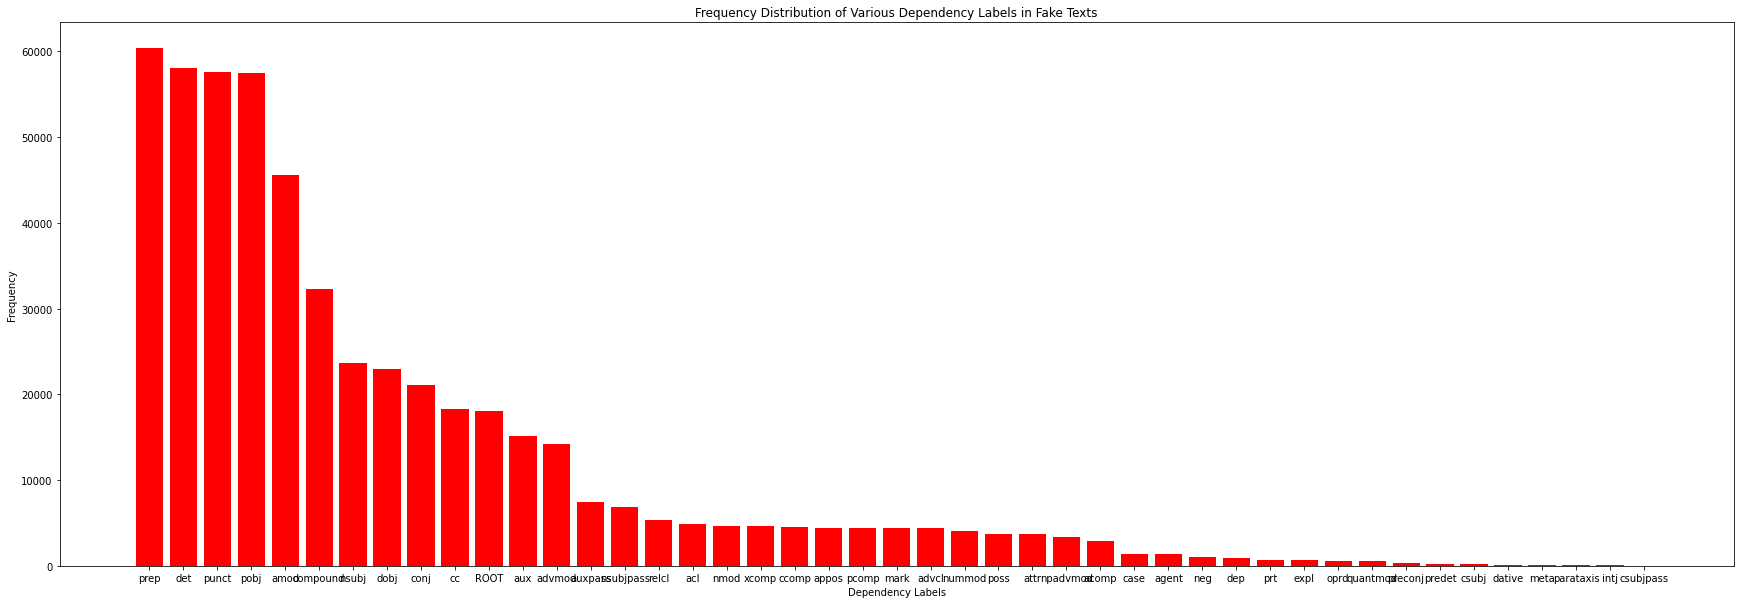

In [ ]:
plt.figure(figsize=(30,10))
plt.bar(f_depen_sort.keys(), f_depen_sort.values(), color= 'red')
plt.title("Frequency Distribution of Various Dependency Labels in Fake Texts")
plt.xlabel("Dependency Labels")
plt.ylabel("Frequency")
plt.show()

**Interpretation:** There are much more determiners used in fake texts than human generated texts. 

---
B. Compute the distribution of sentence lengths and plot boxplots of sentence lengths for fake and human-generated articles.

In [ ]:
def sentlen(text):
  sent_len= []
  for t in text:
    doc = nlp(t)
    for sent in doc.sents:
      senlist= sent.text.split()
      sent_len.append(len(senlist))
  return sent_len

In [ ]:
hg_senlen = sentlen(human_gen_text)
f_senlen = sentlen(fake_text) 

In [ ]:
len_of_sent = pd.DataFrame(list(zip(hg_senlen, f_senlen)), columns =['HumanGenerated', 'Fake'])

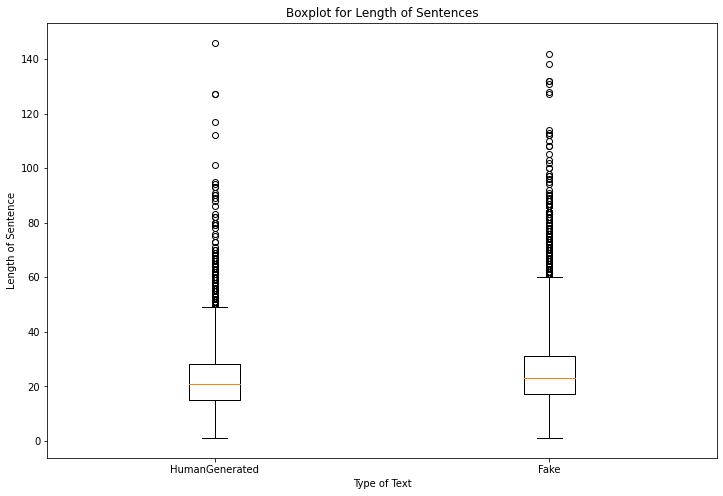

In [ ]:
plt.figure(figsize=(12, 8))
plt.boxplot(len_of_sent, whis=(0, 98))
plt.title("Boxplot for Length of Sentences")
plt.xlabel("Type of Text")
plt.xticks([1, 2], ['HumanGenerated', 'Fake'])
plt.ylabel("Length of Sentence")
plt.show()

**Interpretation:** Fake text generators use longer sentences as compared to sentences written by humans.

---
C. Find top-50 words used in fake and human-generated texts, and state if there are
any similarities or dissimilarities.

In [ ]:
def create_vocab(texts):
  vocab = Counter()
  for t in texts:
    doc = nlp(t)
    for sent in doc.sents:
      for tok in sent:
        if tok.pos_!='PUNCT':
          vocab.update([tok.lemma_])
  
  return vocab

In [ ]:
hg_vocab = create_vocab(human_gen_text)
f_vocab = create_vocab(fake_text)

In [ ]:
hg_vocab= hg_vocab.most_common(50)
f_vocab= f_vocab.most_common(50)

In [ ]:
hg50= set()
ft50= set()
for i in hg_vocab:
  hg50.add(i[0])

for j in f_vocab:
  ft50.add(j[0])

In [ ]:
print(f"The 50 most common words in Human Generated Texts are {hg50}")
print(f"The 50 most common words in Fake Texts are {ft50}")

The 50 most common words in Human Generated Texts are {'not', 'system', 'between', 'the', 'and', 'a', '/', 'high', 'use', 'as', 'from', 'it', 'cell', 'an', 'to', 'by', 'model', 'time', 'datum', '-', 'show', 'be', 'increase', 'paper', 'design', 'can', 'on', 'result', 'at', 'level', 'with', 'this', 'in', 'base', 'also', 'for', 'which', 'or', 'propose', 'these', 'have', 'study', 'more', '%', 'we', 'that', 'patient', 'of', 'method', 'present'}
The 50 most common words in Fake Texts are {'not', 'system', 'the', 'and', 'a', 'they', 'high', 'focus', 'use', 'as', 'it', 'from', 'an', 'effect', 'to', 'by', 'model', 'time', 'datum', '-', "'s", 'application', 'author', 'be', 'discuss', 'paper', 'design', 'can', 'new', 'on', 'different', 'their', 'at', 'with', 'this', 'in', 'base', 'will', 'for', 'which', 'or', 'other', 'these', 'have', 'study', 'more', 'we', 'that', 'of', 'how'}


In [ ]:
len(hg50.intersection(ft50))

37

In [ ]:
len(hg50.union(ft50))

63

In [ ]:
print(ft50.difference(hg50))

{'other', 'how', 'they', 'focus', "'s", 'their', 'application', 'author', 'will', 'effect', 'discuss', 'new', 'different'}


In [ ]:
print(hg50.difference(ft50))

{'between', 'result', '%', '/', 'show', 'level', 'cell', 'increase', 'also', 'patient', 'method', 'present', 'propose'}


**Interpretation:** Among the top 50 root words used in human and fake texts, around 75% of the words are common. 

---
D. Find popular unigrams, bigrams, and trigrams which occur in fake text but not in
human-generated texts.

In [ ]:
def find_ngram(text):
  unigrams=[]
  bigrams = []
  trigrams= []
  for t in text:
    doc=nlp(t)
    ng1= list(textacy.extract.ngrams(doc, 1, min_freq=5))
    ng2= list(textacy.extract.ngrams(doc, 2, min_freq=5))
    ng3= list(textacy.extract.ngrams(doc, 3, min_freq=5))
    unigrams.extend(ng1)
    bigrams.extend(ng2)
    trigrams.extend(ng3)
  return unigrams, bigrams, trigrams

In [ ]:
hg_uni, hg_bi, hg_tri = find_ngram(human_gen_text)
f_uni, f_bi, f_tri = find_ngram(fake_text)

In [ ]:
hg_uni20 = Counter(hg_uni).most_common(20)
hg_bi20 = Counter(hg_bi).most_common(20)
hg_tri20 = Counter(hg_tri).most_common(20)
f_uni20 = Counter(f_uni).most_common(20)
f_bi20 = Counter(f_bi).most_common(20)
f_tri20 = Counter(f_tri).most_common(20)

In [ ]:
def convert_set(li):
  setli= set()
  for i in li:
    setli.add(i[0])
  return setli

In [ ]:
hguni= convert_set(hg_uni20)
hgbi= convert_set(hg_bi20)
hgtri= convert_set(hg_tri20)
funi= convert_set(f_uni20)
fbi= convert_set(f_bi20)
ftri= convert_set(f_tri20)

In [ ]:
print(f"The popular unigrams that are not present in human generated text but are present in fake texts are:")
print(funi.difference(hguni))

The popular unigrams that are not present in human generated text but are present in fake texts are:
{recurrence, cancer, breast, patients, recurrence, breast, primary, breast, chemotherapy, patients, cancer, primary, chemotherapy, cancer, primary, chemotherapy, chemotherapy, cancer, patients, breast}


In [ ]:
print(f"The popular bigrams that are not present in human generated text but are present in fake texts are:")
print(fbi.difference(hgbi))

The popular bigrams that are not present in human generated text but are present in fake texts are:
{de la, de la, de la, sea fermentation, de la, Sea fermentation, breast cancer, breast cancer, breast cancer, American Academy, de la, breast cancer, sea fermentation, American Academy, de la, sea fermentation, de la, breast cancer, breast cancer, sea fermentation}


In [ ]:
print(f"The popular trigrams that are not present in human generated text but are present in fake texts are:")
print(ftri.difference(hgtri))

The popular trigrams that are not present in human generated text but are present in fake texts are:
{number of physical, Academy of Pediatrics, Academy of Pediatrics, Academy of Pediatrics, γδ T cells, γδ T cells, VEGFR2 tyrosine kinase, Academy of Pediatrics, number of physical, VEGFR2 tyrosine kinase, γδ T cells, number of physical, γδ T cells, number of physical, Academy of Pediatrics, γδ T cells, number of physical, VEGFR2 tyrosine kinase, VEGFR2 tyrosine kinase, VEGFR2 tyrosine kinase}
